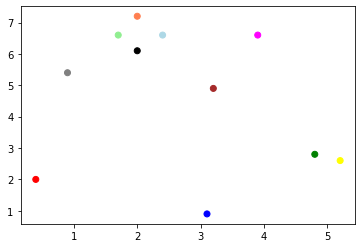

In [64]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from matplotlib import collections as mc


X = np.array([
    [0.4, 2],    #red    0
    [3.1, 0.9],  #blue   1
    [4.8, 2.8],  #green  2
    [5.2, 2.6],  #yellow 3k
    [3.2, 4.9],  #brown  4
    [0.9, 5.4],  #gray   5
    [2, 6.1],    #black   6
    [1.7, 6.6],  #lightgreen  7
    [2.4, 6.6],  #lightblue   8
    [3.9, 6.6],  #magenta     9
    [2, 7.2]     #coral      10
])

plt.scatter(X[:,0], X[:,1], color=['red', 'blue', 'green', 'yellow', 'brown', 'gray', 'black', 'lightgreen', 'lightblue', 'magenta', 'coral'])

# Single linkage (min)

In [2]:
clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', compute_full_tree=True, distance_threshold=0, linkage='single',
                                     compute_distances=True)

In [3]:
clustering

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0, linkage='single',
                        n_clusters=None)

In [4]:
clustering.fit(X)

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0, linkage='single',
                        n_clusters=None)

In [5]:
clustering.distances_

array([0.4472136 , 0.58309519, 0.64031242, 0.67082039, 1.30384048,
       1.5       , 1.69705627, 2.54950976, 2.64007576, 2.91547595])

In [41]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
#     return linkage_matrix
    dendrogram(linkage_matrix, **kwargs)

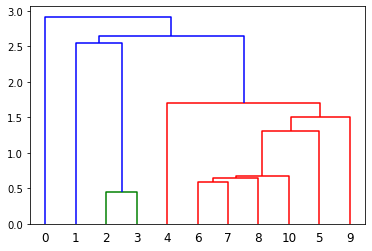

In [45]:
plot_dendrogram(clustering)

In [73]:
def show_plot(model):
    def comp(y, ch):
        while y >= X.shape[0]:
            y = ch[y - X.shape[0]][0]
                
        else:
            return y
    
    for i in range(len(model.children_) + 1) :    
        lc = mc.LineCollection([[X[comp(x, model.children_)], X[comp(y, model.children_)]] for x, y in model.children_[:i + 1]], color='black', linewidths=1)
        fig, ax = plt.subplots()
        ax.add_collection(lc)
        ax.autoscale()
        ax.scatter(X[:,0], X[:,1], color=['red', 'blue', 'green', 'yellow', 'brown', 'gray', 'black', 'lightgreen', 'lightblue', 'magenta', 'coral'])
        plt.show()

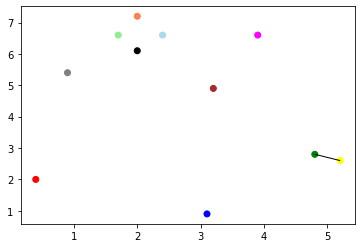

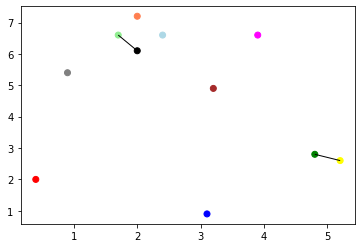

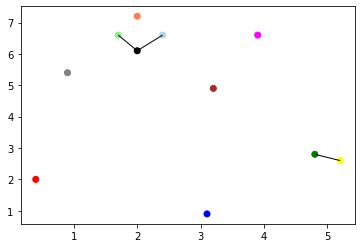

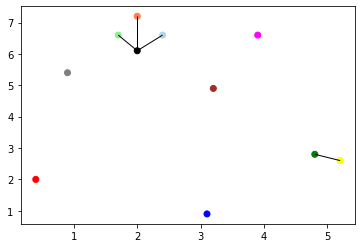

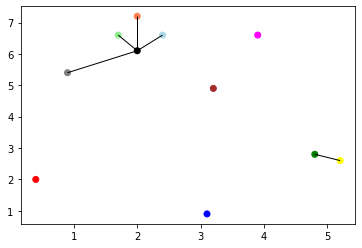

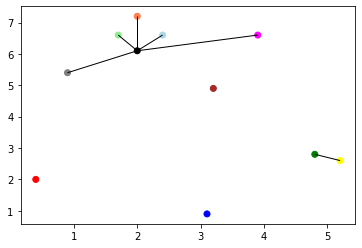

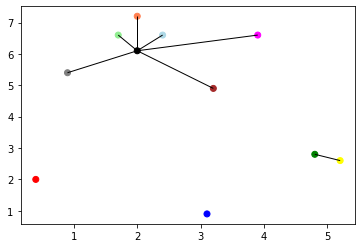

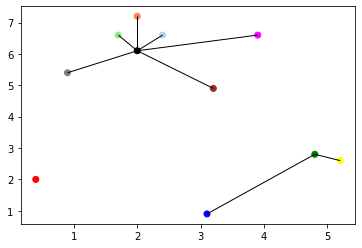

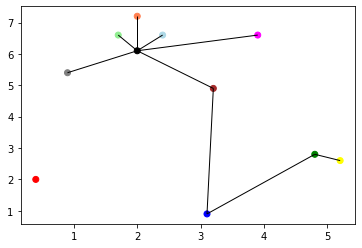

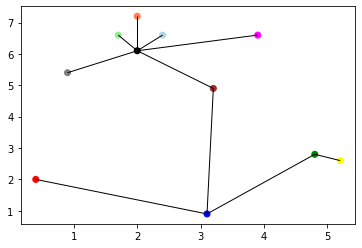

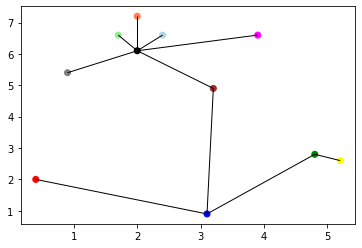

In [74]:
show_plot(clustering)

# Complete linkage (max)

In [79]:
clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', compute_full_tree=True, distance_threshold=0, linkage='complete',
                                     compute_distances=True)
clustering.fit(X)

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0, linkage='complete',
                        n_clusters=None)

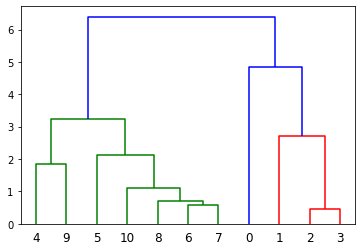

In [80]:
plot_dendrogram(clustering)

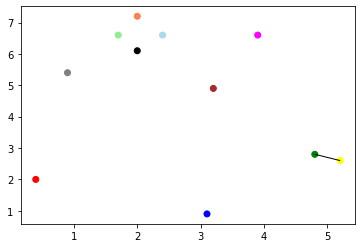

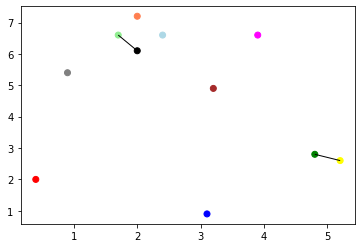

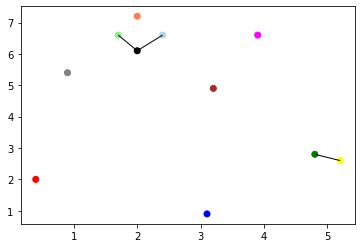

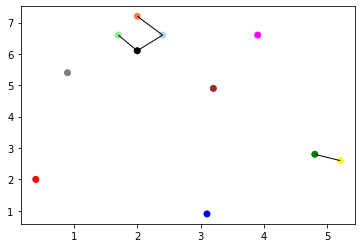

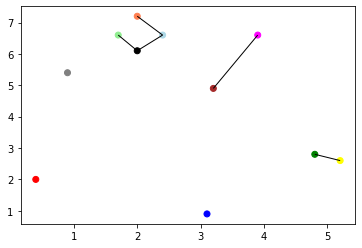

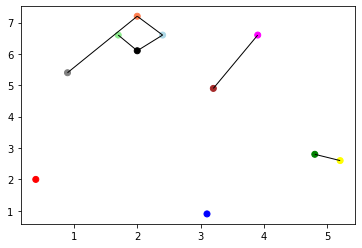

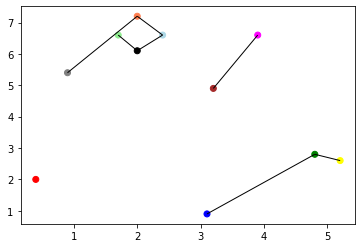

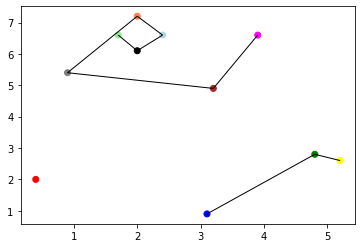

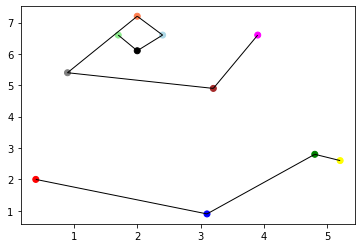

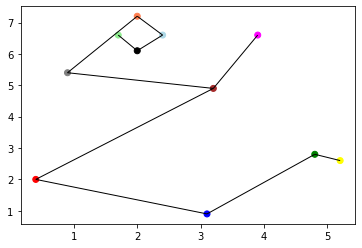

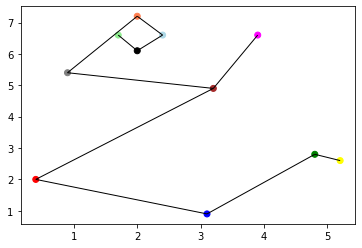

In [81]:
show_plot(clustering)

# Average linkage

In [82]:
clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', compute_full_tree=True, distance_threshold=0, linkage='average',
                                     compute_distances=True)
clustering.fit(X)

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0, linkage='average',
                        n_clusters=None)

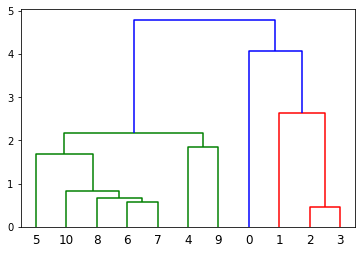

In [83]:
plot_dendrogram(clustering)

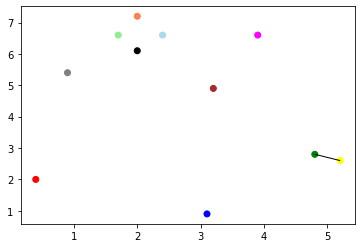

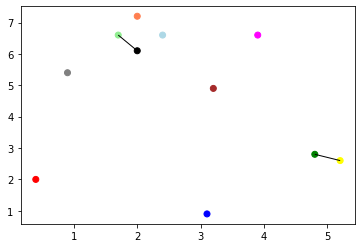

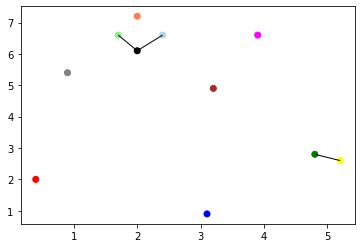

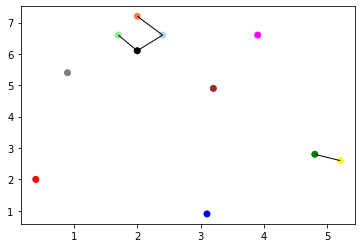

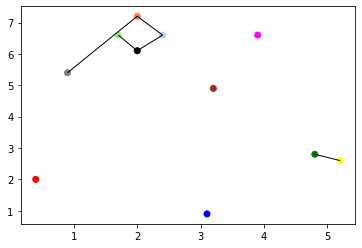

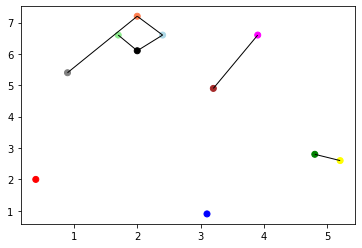

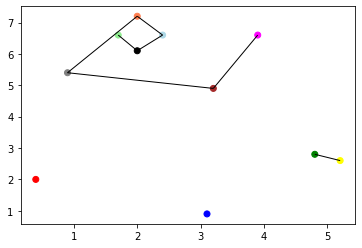

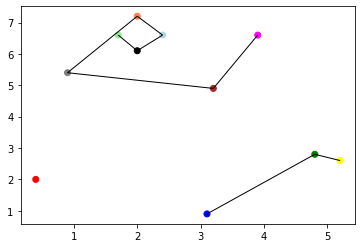

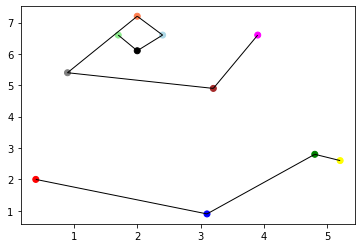

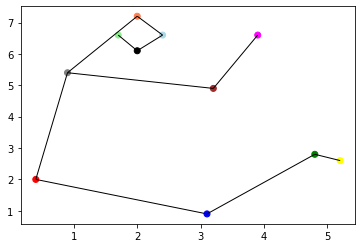

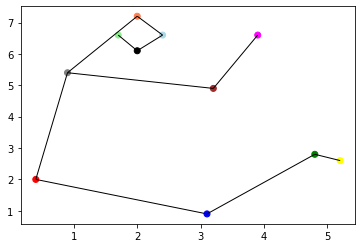

In [84]:
show_plot(clustering)

# Ward-linkage

In [85]:
clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', compute_full_tree=True, distance_threshold=0, linkage='ward',
                                     compute_distances=True)
clustering.fit(X)

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0, n_clusters=None)

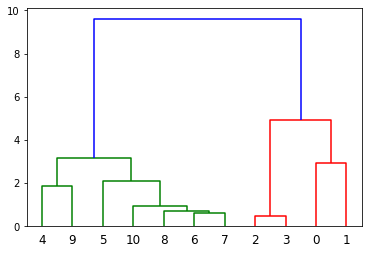

In [86]:
plot_dendrogram(clustering)

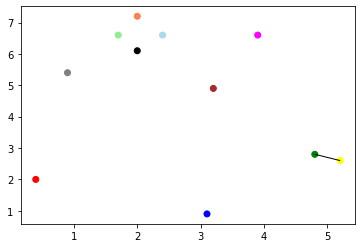

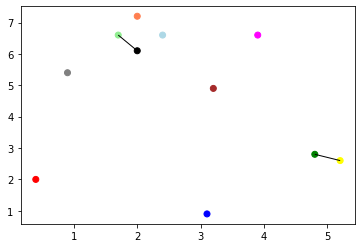

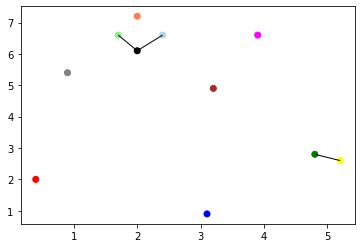

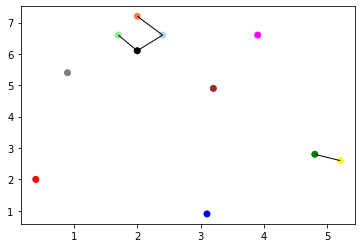

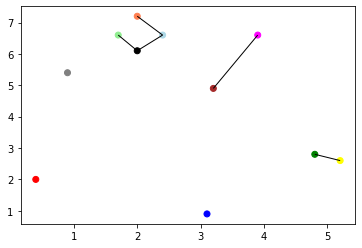

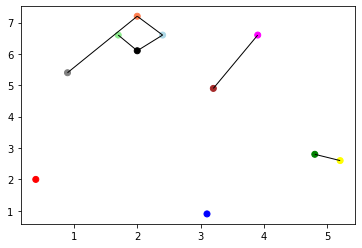

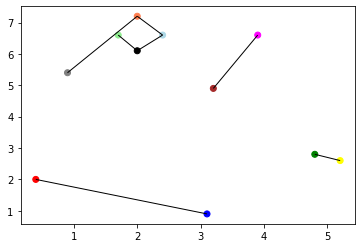

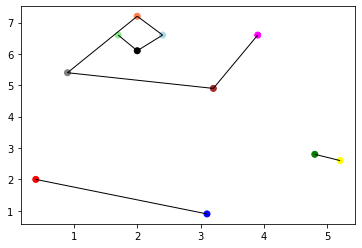

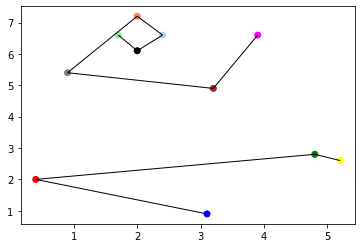

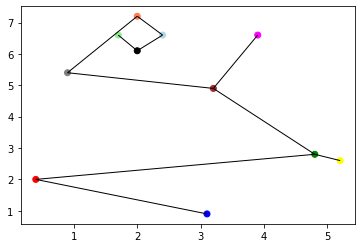

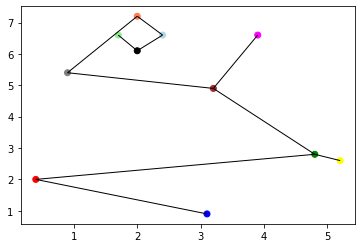

In [87]:
show_plot(clustering)